<a href="https://colab.research.google.com/github/faizan1402/chatbots/blob/main/chatbots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' -> We will be implementing a chat bot that can answer questions based on a "story"given to the bot.
  -> we will use the babi dataset released by facebook research.
  https://research.fb.com/downloads/babi'''

In [ ]:
# How the QA Bot Network works
#End to End Network:
# input memory representation
# output memory representation
# generating final prediction
# create a full model with rnn and multiple layers


#**Step-1 Load The Data**

In [ ]:
import pickle
import numpy as np

In [ ]:
#local file upload in google colab
#but drive mount ('content/drive/MyDrive/Path of file name)
with open("train_qa.txt", "rb") as f:   # Unpickling (rb means read the  binary file (train the train_qa.txt file) )
    train_data =  pickle.load(f)

In [ ]:

with open("test_qa.txt", "rb") as f:   # Unpickling (train the test_qa.txt file )
    test_data =  pickle.load(f)

#**Exploring the Format of the Data**

In [ ]:
type(test_data)

list

In [ ]:
type(train_data)

list

In [ ]:
len(test_data)

1000

In [ ]:
train_data

In [ ]:
# so print list of tuples

In [ ]:
# Que -['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
# Ans - 'no'),
 #...]

In [ ]:
#training data
train_data[0]# in 0 index print the tuples and also printed questions and ans
# printed the story,questions and answers



(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [ ]:
train_data[0][0]
# complete tuples are printed

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
# join function every word are merge
' '.join(train_data[0][0])
#so list is convert into sentence (or story)

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [ ]:
'  '.join(train_data[0][1])
#list 1 index is output print -> Is Sandra in the halway?



'Is  Sandra  in  the  hallway  ?'

In [ ]:
train_data[0][2]

'no'

In [ ]:
all_data = test_data + train_data

In [ ]:
len(all_data)

11000

In [ ]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

**Setting up Vocabulary of All Words**

In [ ]:
# Create a set that holds the vocab words
vocab = set()

for story,question,answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))
# for all stament is true means either story,vocab,punct,questons and answers all of these are true 

In [ ]:
vocab.add('no')
vocab.add('yes')

In [ ]:
vocab
# print all the possible vocabulary

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
vocab_len = len(vocab) + 1

In [ ]:
vocab_len

38

In [ ]:
all_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [ ]:
all_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
# longest story length
all_story_len = [len(data[0]) for data in all_data]

In [ ]:
all_story_len

In [ ]:
# maximum story length

#len
#max_story_len = max([len(data[0]) for data in all_data])

In [ ]:
max_story_len = max(all_story_len)
max_story_len

156

In [ ]:
# maximum question length
max_question_len = max([len(data[1]) for data in all_data])

In [ ]:
max_question_len

6

#**Vectorizing the Data**

In [ ]:
#Understand the steps on how to vectorize the data
# Create a function that can vectorize for us.


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [ ]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index
# so print the dictionary of set,vocab,specific index
#Example -{,'there':20}

{'.': 5,
 '?': 2,
 'apple': 21,
 'back': 9,
 'bathroom': 31,
 'bedroom': 23,
 'daniel': 24,
 'discarded': 19,
 'down': 36,
 'dropped': 30,
 'football': 25,
 'garden': 3,
 'got': 4,
 'grabbed': 37,
 'hallway': 34,
 'in': 6,
 'is': 1,
 'john': 22,
 'journeyed': 16,
 'kitchen': 8,
 'left': 28,
 'mary': 32,
 'milk': 10,
 'moved': 33,
 'no': 35,
 'office': 11,
 'picked': 13,
 'put': 17,
 'sandra': 29,
 'the': 18,
 'there': 26,
 'to': 20,
 'took': 12,
 'travelled': 7,
 'up': 27,
 'went': 15,
 'yes': 14}

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []


In [ ]:

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [ ]:
train_story_text
#so all story is seperated form

In [ ]:
train_question_text

In [ ]:
train_answers

In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
len(train_story_seq)

10000

In [ ]:
len(train_story_text)

10000

In [ ]:
train_story_seq
# story is printed numerical version

#**Functionalize Vectorization**

In [ ]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [ ]:
  '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    

In [ ]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [ ]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [ ]:
inputs_test

array([[ 0,  0,  0, ..., 18, 23,  5],
       [ 0,  0,  0, ..., 18,  3,  5],
       [ 0,  0,  0, ..., 18,  3,  5],
       ...,
       [ 0,  0,  0, ..., 18, 21,  5],
       [ 0,  0,  0, ..., 18,  3,  5],
       [ 0,  0,  0, ..., 21, 26,  5]], dtype=int32)

In [ ]:
answers_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tokenizer.word_index['yes']

14

In [ ]:
tokenizer.word_index['no']

35

In [ ]:
sum(answers_test)
# so index 14 number is 497 and index 35  then number is 503

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 503.,   0.,   0.])

#**Creating the Model**

In [ ]:
#Build the Neurl Network
 #-> Input Encoder M
 #-> Input Encoder C
# -> Question Encoder

# Complete the Network

In [ ]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

#**Placeholders for Inputs**

#
Recall we technically have two inputs, stories and questions. So we need to use placeholders. Input() is used to instantiate a Keras tensor.

In [ ]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [ ]:
#vocab_len
vocab_size = len(vocab) + 1

#**Building the Networks**


To understand why we chose this setup, make sure to read the paper we are using:
Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus, "End-To-End Memory Networks", http://arxiv.org/abs/1503.08895

#**Encoders**
Input Encoder m

In [ ]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

Input Encoder c

In [ ]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)


Question Encoder

In [ ]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

Encode the Sequences

In [ ]:
#ENCODED <----ENCODER(INPUT)
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

Use dot product to compute the match between first input vector seq and the query

In [ ]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [ ]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

Add this match matrix with the second input vector sequence

In [ ]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

Concatenate

In [ ]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [ ]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [ ]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [ ]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)# Yes/no 0000

In [ ]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)


In [ ]:
# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_7 (Sequential)       (None, None, 64)     2432        input_7[0][0]                    
__________________________________________________________________________________________________
sequential_9 (Sequential)       (None, 6, 64)        2432        input_8[0][0]                    
____________________________________________________________________________________________

.Fit/Train the network
1-(we will load a pre-trained network)
2- Plot out training history
3- Evaluate on test set
4- Create our own stories and questions

In [ ]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 7s 16ms/step - loss: 1.1911 - accuracy: 0.4892 - val_loss: 0.6939 - val_accuracy: 0.5030
Epoch 2/120
313/313 [==============================] - 5s 15ms/step - loss: 0.7080 - accuracy: 0.5025 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 3/120
313/313 [==============================] - 5s 14ms/step - loss: 0.6973 - accuracy: 0.4981 - val_loss: 0.6944 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 5s 15ms/step - loss: 0.6954 - accuracy: 0.4950 - val_loss: 0.6939 - val_accuracy: 0.5030
Epoch 5/120
313/313 [==============================] - 5s 15ms/step - loss: 0.6945 - accuracy: 0.5087 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 6/120
313/313 [==============================] - 5s 15ms/step - loss: 0.6944 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.4910
Epoch 7/120
313/313 [==============================] - 5s 14ms/step - loss: 0.6941 - accuracy: 0.5012 - val_loss: 0.6940 - val_accuracy:

#**Saving the Model**

In [ ]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

#**Evaluating the Model**
Plotting Out Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


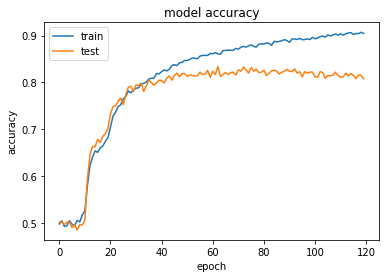

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluating on Given Test Set

In [ ]:
# model.save('mybrandnewmodel.h5)
#upload chatbot_10.h5 file


In [ ]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [ ]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [ ]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [ ]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [ ]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [ ]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [ ]:
pred_results

array([[2.8431196e-13, 3.0948776e-13, 2.9342202e-13, ..., 9.9879706e-01,
        2.9747597e-13, 3.0569083e-13],
       [2.5079122e-13, 3.0147916e-13, 2.4026525e-13, ..., 8.8647544e-01,
        2.5769816e-13, 2.7682172e-13],
       [1.6953926e-16, 1.5144159e-16, 1.6262192e-16, ..., 1.4121736e-02,
        1.4835617e-16, 1.6561819e-16],
       ...,
       [7.7363589e-18, 1.0672052e-17, 8.8428527e-18, ..., 9.9999976e-01,
        8.3934463e-18, 9.4415777e-18],
       [1.0852154e-17, 1.0190999e-17, 1.1965545e-17, ..., 1.7597027e-02,
        1.1712331e-17, 1.1132965e-17],
       [9.4981923e-16, 9.9831102e-16, 1.0151973e-15, ..., 1.1910453e-01,
        9.1230054e-16, 1.1098710e-15]], dtype=float32)

In [ ]:
pred_results[0]

array([2.8431196e-13, 3.0948776e-13, 2.9342202e-13, 2.8213602e-13,
       3.0865891e-13, 3.2646677e-13, 2.3995595e-13, 3.1183302e-13,
       3.1772995e-13, 2.9654350e-13, 3.3567165e-13, 2.6643509e-13,
       2.8074781e-13, 3.4994720e-13, 1.2029725e-03, 3.1780996e-13,
       3.2766574e-13, 2.7010482e-13, 3.0470472e-13, 3.1685242e-13,
       3.2818239e-13, 3.3292604e-13, 3.0569666e-13, 3.1764635e-13,
       3.2863588e-13, 2.9794385e-13, 3.2431935e-13, 2.9466487e-13,
       3.0729726e-13, 2.8201334e-13, 3.0292804e-13, 3.2797341e-13,
       2.9953817e-13, 3.2837147e-13, 2.7639737e-13, 9.9879706e-01,
       2.9747597e-13, 3.0569083e-13], dtype=float32)

In [ ]:
val_max = np.argmax(pred_results[0])

In [ ]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        



In [ ]:
k

'no'

In [ ]:
pred_results[0][val_max]

0.99879706

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
my_story = "John left the kitchen . Sandra dropped the football in the garden."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden.']

In [ ]:
my_question = "Is the football in the garden ?"
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [ ]:
mydata = [(my_story.split(),my_question.split(),'yes')]
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [ ]:
my_story,my_ques,my_ans = vectorize_stories(mydata)


KeyError: ignored

In [ ]:
pred_results = model.predict(([ my_story, my_ques]))

NameError: ignored

In [ ]:
pred_results = model.predict(([my], queries_test]))

ValueError: ignored

In [ ]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.99879706
